In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pylab import rcParams
#from fbprophet import Prophet

In [87]:
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (44.4 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.3.0-py3-none-any.whl (31 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and

In [85]:
pip install prophet --no-binary :all:

In [38]:
df =pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,9/1/2010 0:00,15.8,1688.21500,3.6900,23.710
1,9/1/2010 1:00,15.8,1669.19500,3.6900,22.635
2,9/1/2010 2:00,15.8,1491.98000,3.6900,22.565
3,9/1/2010 3:00,15.8,1330.76000,3.6900,18.910
4,9/1/2010 4:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2/28/2021 19:00,24.3,449.63625,5.4848,117.925
92012,2/28/2021 20:00,24.3,815.59975,5.4848,87.880
92013,2/28/2021 21:00,24.3,745.12325,5.4848,62.060
92014,2/28/2021 22:00,24.3,694.95150,5.4848,62.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [34]:
## Convert Full Date Column to Date Time

df['FullDate'] = pd.to_datetime(df['FullDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      92016 non-null  int64         
 1   FullDate   92016 non-null  datetime64[ns]
 2   Tmax       92016 non-null  float64       
 3   SysLoad    92016 non-null  float64       
 4   GasPrice   92016 non-null  float64       
 5   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.2 MB


In [36]:
## Resampling on a daily Basis and decreasing the number of points (downsampling)

df_copy = df
df_copy.reset_index(inplace = True)
#df_copy
df_daily = df_copy.resample('D',on ='FullDate').sum()

In [39]:
df_daily.sample(5)

,level_0,index,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,,,
2013-10-11,654612,654612,489.6,24219.85295,102.0288,1982.305
2019-11-23,1941396,1941396,552.0,5340.80490,165.6312,1239.565
2012-09-04,423060,423060,648.0,9709.85630,124.2912,1048.180
2020-09-23,2117076,2117076,379.2,-4586.45090,108.5040,172.065
2014-08-13,830868,830868,326.4,22573.09515,99.7656,740.325


In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      92016 non-null  int64         
 1   FullDate   92016 non-null  datetime64[ns]
 2   Tmax       92016 non-null  float64       
 3   SysLoad    92016 non-null  float64       
 4   GasPrice   92016 non-null  float64       
 5   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.2 MB


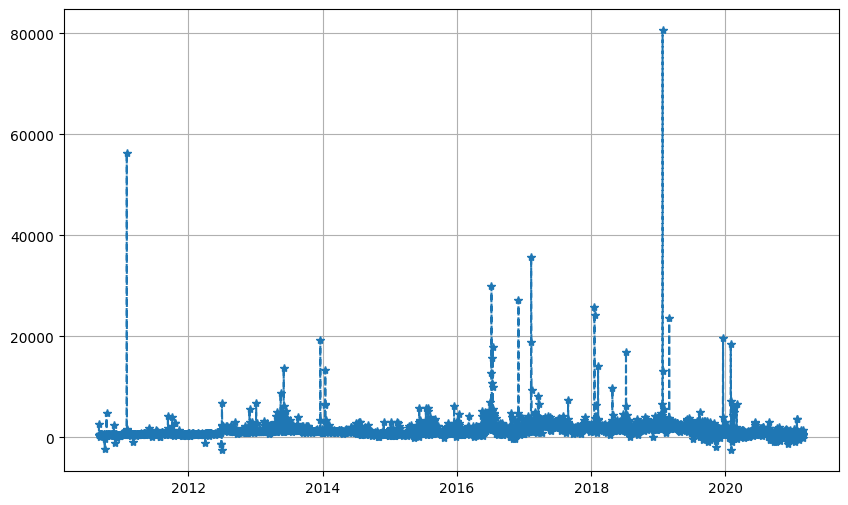

In [41]:
plt.figure(figsize = (10,6))
plt.plot (df_daily.index,df_daily.ElecPrice,'--', marker ='*')
plt.grid()

In [44]:
## Using the Adfuller Library

adf_result = adfuller(df_daily.SysLoad)

print('ADF Statistic:',adf_result[0])
print('P-Value:',adf_result[1])
for k, v in adf_result[4].items():
 print( f' {k} : {v} ' )


ADF Statistic: -3.6901589888366444
P-Value: 0.00425372550457414
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [45]:
adf_result = adfuller(df_daily.GasPrice)

print('ADF Statistic:',adf_result[0])
print('P-Value:',adf_result[1])
for k, v in adf_result[4].items():
 print( f' {k} : {v} ' )


ADF Statistic: -2.9027666971651818
P-Value: 0.04502721288462516
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [46]:
adf_result = adfuller(df_daily.ElecPrice)

print('ADF Statistic:',adf_result[0])
print('P-Value:',adf_result[1])
for k, v in adf_result[4].items():
 print( f' {k} : {v} ' )

ADF Statistic: -8.269053866873794
P-Value: 4.848817773711914e-13
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [67]:
#df_daily.reset_index()
#df.daily.drop(['level_0'])
df_daily
df_daily = df_daily.drop(['level_0','index'],axis=1)

In [70]:
x_train = df_daily.iloc[:2757, :]
x_test  = df_daily.iloc[2757:len(df), :]

x_train.shape
x_test.shape

(1077, 5)

In [90]:
## Using the Prophet Model

#mdl = Prophet()
#mdl.fit(x_train)


In [91]:
#y_pred = prophet_model.predict(test_set)